# Import nessery modules

In [57]:
import pandas as pd ## pip install pandas
import numpy as np  ##pip install numpy
from sklearn.datasets import load_iris ## pip install scikit-learn
import matplotlib.pyplot as plt ## pip install matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor ## pip install xgboost
from sklearn import metrics
from sklearn.metrics import r2_score
import seaborn as sns ## pip install seaborn

# Loading Data set

In [58]:
raw_data=pd.read_csv('Advertising.csv')
raw_data.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


# Exploratory data analysis

In [59]:
list(raw_data.columns)

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [60]:
raw_data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [61]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [62]:
raw_data.isnull().values.any()
raw_data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

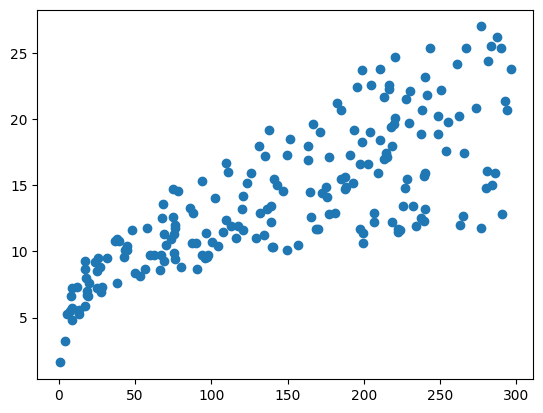

In [63]:
plt.scatter(raw_data['TV'],raw_data['Sales'])
plt.show()

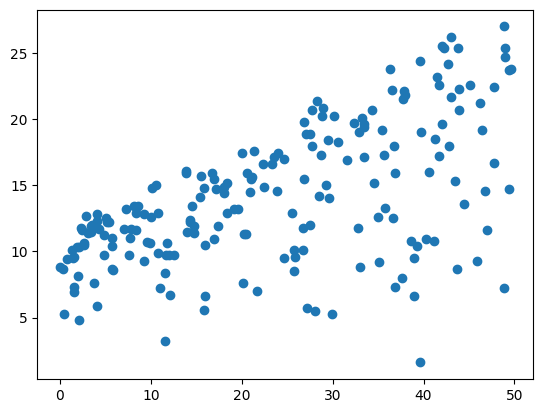

In [64]:
plt.scatter(raw_data['Radio'],raw_data['Sales'])
plt.show()

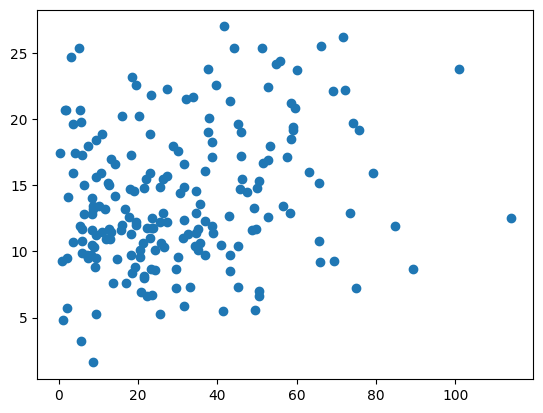

In [65]:
plt.scatter(raw_data['Newspaper'],raw_data['Sales'])
plt.show()

<Axes: xlabel='TV', ylabel='Sales'>

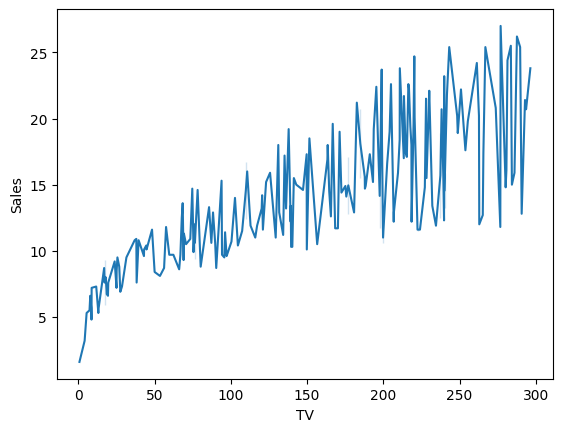

In [66]:
sns.lineplot(x=raw_data['TV'],y=raw_data['Sales'])

<Axes: xlabel='Newspaper', ylabel='Sales'>

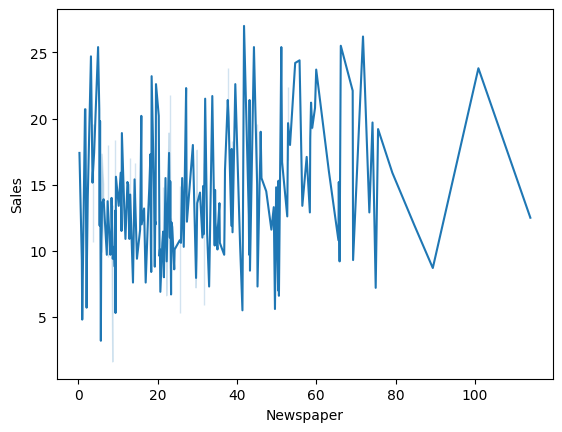

In [67]:
sns.lineplot(x=raw_data['Newspaper'],y=raw_data['Sales'])

<Axes: xlabel='Radio', ylabel='Sales'>

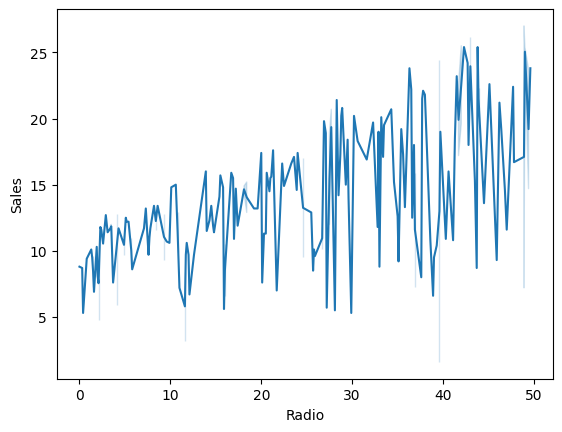

In [68]:
sns.lineplot(x=raw_data['Radio'],y=raw_data['Sales'])

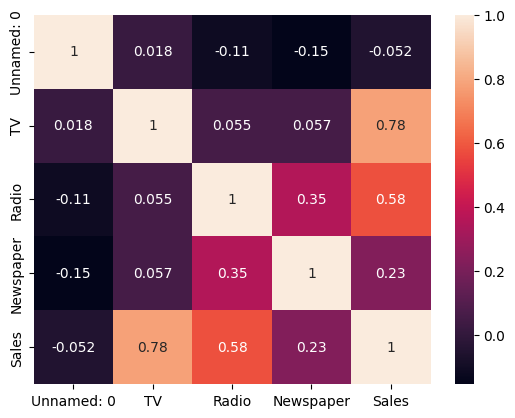

In [69]:
correaltion=raw_data.corr()
sns.heatmap(correaltion,annot=True)
plt.show()

# Data Preprocessing
#### As there are columns with string values we need to convert them by assigning numaric values

In [70]:
data=raw_data.drop('Unnamed: 0',axis=1)

# Feature Extraction 

In [71]:
X=np.array(data.iloc[:,:-1])
Y=np.array(data.iloc[:,-1])

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=123)

In [73]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(180, 3) (180,)
(20, 3) (20,)


# Model selection

In [74]:
LR_model=LinearRegression()
LR_model.fit(X_train,Y_train)

LinearRegression()

In [75]:
Y_predicted_LR=LR_model.predict(X_test)
accurecy=r2_score(Y_test,Y_predicted_LR)
print(accurecy*100)

89.14812795822675


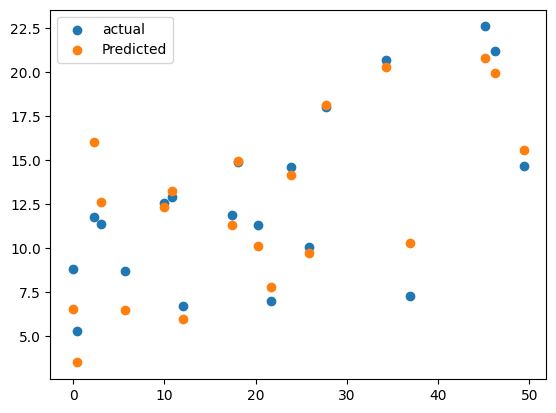

In [76]:
plt.scatter(X_test[:,1],Y_test)
plt.scatter(X_test[:,1],Y_predicted_LR)
plt.legend(['actual','Predicted'])

In [77]:
XGB_model=XGBRegressor()
XGB_model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [78]:
Y_predicted_XGB=XGB_model.predict(X_test)
accurecy=r2_score(Y_test,Y_predicted_XGB)
print(accurecy*100)

97.82568360324616


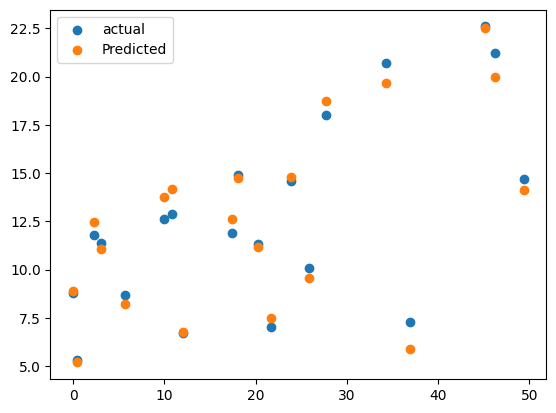

In [79]:
plt.scatter(X_test[:,1],Y_test)
plt.scatter(X_test[:,1],Y_predicted_XGB)
plt.legend(['actual','Predicted'])

In [80]:
DTR_model = DecisionTreeRegressor()
DTR_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [81]:
Y_predicted_DTR=DTR_model.predict(X_test)
accurecy=r2_score(Y_test,Y_predicted_DTR)
print(accurecy*100)

98.0498386385024


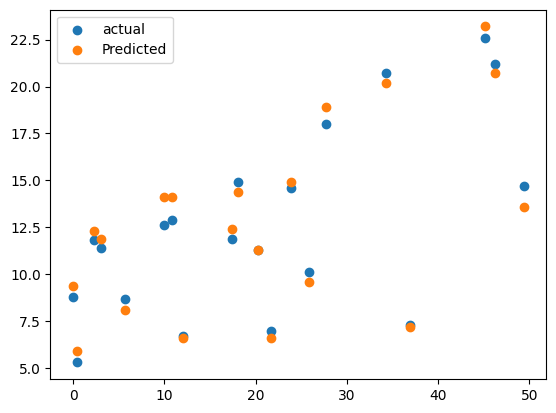

In [82]:
plt.scatter(X_test[:,1],Y_test)
plt.scatter(X_test[:,1],Y_predicted_DTR)
plt.legend(['actual','Predicted'])

In [83]:
RFR_model=RandomForestRegressor()
RFR_model.fit(X_train,Y_train)

RandomForestRegressor()

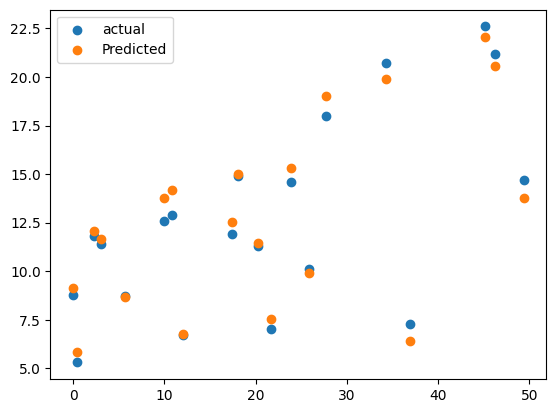

In [84]:
plt.scatter(X_test[:,1],Y_test)
plt.scatter(X_test[:,1],Y_predicted_RFR)
plt.legend(['actual','Predicted'])

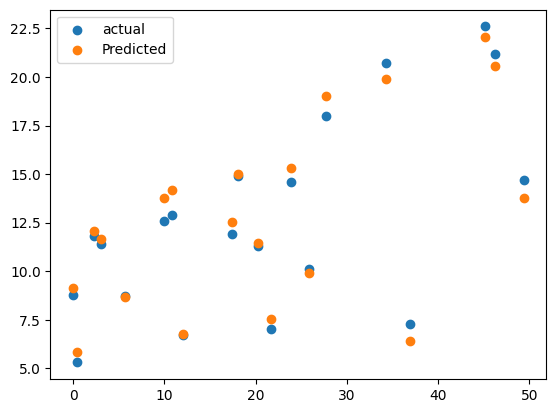

In [85]:
plt.scatter(X_test[:,1],Y_test)
plt.scatter(X_test[:,1],Y_predicted_RFR)
plt.legend(['actual','Predicted'])